In [20]:
#pip install geopandas
#dataset: https://data.apps.fao.org/catalog/iso/b891ca64-4cd4-4efd-a7ca-b386e98d52e8

In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [53]:
# Define the new directory path
new_directory = r'C:\Users\Blanka\Python\rivers_africa_37333'

# Change the current working directory to the new directory
os.chdir(new_directory)
os.getcwd()

'C:\\Users\\Blanka\\Python\\rivers_africa_37333'

In [54]:
rivers = gpd.read_file(r'C:\Users\Blanka\Python\rivers_africa_37333')

In [55]:
rivers.head(3)

,FID_af_str,ARCID,FROM_NODE,TO_NODE,FID_sub_ba,SUB_BAS,MAJ_BAS,MAJ_NAME,SUB_NAME,MAJ_AREA,LEGEND,SUBBAS_ID,TOBAS_ID,Strahler,A_Strahler,RASTERVA_2,RASTERVA_1,Regime,geometry
0,0,1,2,1,32890,201591,7020,Mediterranean South Coast,Algerian east coast,558292,20,7201591,-999,1,8,609.0,5202,P,"LINESTRING (9.22083 37.19167, 9.23125 37.20625..."
1,1,2,5,4,32890,201591,7020,Mediterranean South Coast,Algerian east coast,558292,20,7201591,-999,1,8,460.0,2537,P,"LINESTRING (9.94583 37.17917, 9.93958 37.17292..."
2,2,3,6,7,32890,201591,7020,Mediterranean South Coast,Algerian east coast,558292,20,7201591,-999,2,7,518.0,97325,P,"LINESTRING (9.65625 37.16458, 9.73542 37.16458)"


In [56]:
#FROM_NODE: a hálózat minden egyes ívének kiindulási csomópontja
#TO_NODE: a hálózat minden egyes ívének célpontja
#STRAHLER: A hálózat minden egyes ívének Strahler-folyórendje, amely a vízfolyások hierarchiáját jelzi.
#MAJ_BAS és MAJ_NAME: annak a nagymedencének a számkódja és neve, amelybe az ív esik
#MAJ_AREA: annak a nagymedencének a területe négyzetkilométerben, amelybe az ív esik
#SUB_BAS és SUB_NAME: annak a részmedencének a számkódja és neve, amelybe az ív esik
#SUB_AREA: annak a részmedencének a területe négyzetkilométerben, amelybe az ív esik
#TO_SUBBAS: annak a részmedencének a számkódja, amely felé a részmedence folyik, amelybe az ív esik
#a -888 és -999 kódokat a belső részmedencékhez, illetve a tengerbe ömlő részmedencékhez rendelték
#Regime: "P" = évelő, "I" = időszakos patakok

In [57]:
rivers.shape

(185730, 19)

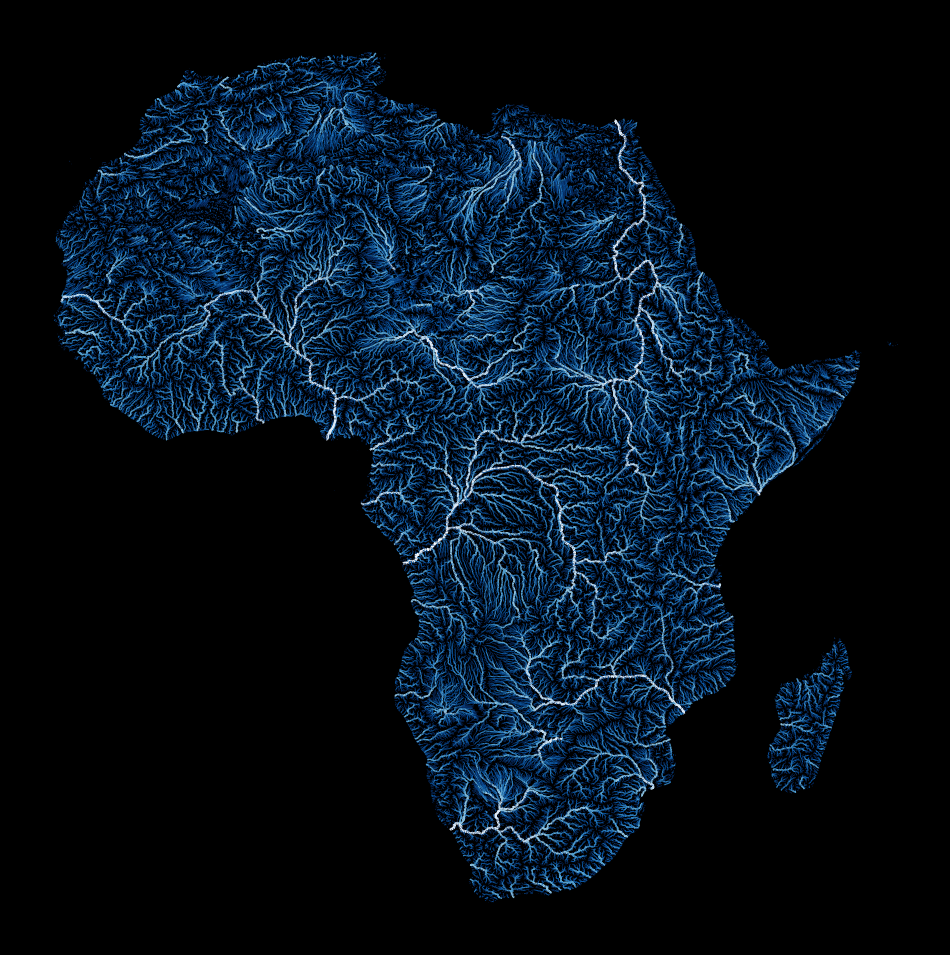

In [60]:
#converting the STRAHLER index into line-width values

rivers['width'] = 10 - rivers.A_Strahler
rivers['width'] = rivers['width']/float(5)

#creating a canvas in matplotli

f, ax = plt.subplots(1,1,figsize=(12,15))

#doing the plotting
rivers.plot(column = 'A_Strahler', ax = ax, linewidth = rivers['width'], cmap = 'Blues')

#editing the plot
f.patch.set_facecolor('k') #fekete háttérszín
ax.axis('off') #axis nevek off
ax.set_facecolor('k') #fekete plot háttérszín

#saving the visual
plt.savefig('rivers_africa.png', dpi = 200, bbox_inches = 'tight')